## Цены на акции Mercedes-Benz Group AG

Набор данных содержит исторические сведенья о ценах на акции Mercedes-Benz Group AG с 1 января 2020 года по 1 мая 2024 года. Данные включают в себя ежедневные цены открытия, максимумы, минимумы и закрытия, а также скорректированные цены закрытия и объём.

**Анализ данных будет проходить в четыре этапа:**
1. Загрузка и просмотр данных.
2. Предварительная очистка и подготовка данных к анализу.
3. Анализ данных.
4. Выводы

### Загрузка и просмотр данных

In [1]:
# Импорт библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# Загрузка файла с данными
data = pd.read_csv('MBG.csv')

In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,41.092484,41.845215,40.971882,41.566578,33.846729,2973654
1,2020-01-03,41.296261,41.362801,40.302322,40.813847,33.233799,4014262
2,2020-01-06,40.202515,40.593433,39.703465,40.593433,33.054317,3441396
3,2020-01-07,40.797215,41.208927,40.680767,40.917816,33.318455,2816618
4,2020-01-08,40.589275,41.167339,40.489468,41.146545,33.504704,2659070


In [4]:
data.shape

(1105, 7)

Набор данных включает в себя таблицу с 1105 строками и 7 столбцами.

In [5]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

В таблице представлены следующие колонки:
* Data- дата наблюдения
* Open - цена открытия
* Hight - максимальная цена
* Low - минимальная цена
* Close - цена закрытия
* Adj Close - скорректированная цена закрытия
* Volume - объем торгов

Рассмотрим общую информацию по таблице:

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1105 entries, 0 to 1104
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1105 non-null   object 
 1   Open       1105 non-null   float64
 2   High       1105 non-null   float64
 3   Low        1105 non-null   float64
 4   Close      1105 non-null   float64
 5   Adj Close  1105 non-null   float64
 6   Volume     1105 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 60.6+ KB


In [7]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1105.000000,1105.000000,1105.000000,1105.000000,1105.000000,1.105000e+03
mean,57.601284,58.280954,56.878953,57.592108,52.302903,3.783187e+06
std,14.356715,14.382103,14.309748,14.356889,15.105935,2.648432e+06
min,18.061396,19.225842,17.479174,18.165363,14.791645,0.000000e+00
25%,50.395580,52.060001,49.988022,50.619999,45.035072,2.178624e+06
50%,62.080002,62.730000,61.366329,62.031727,55.401306,3.027640e+06
75%,68.089996,68.650002,67.309998,67.978722,63.179527,4.398045e+06
max,76.940002,77.900002,75.949997,76.610001,76.610001,2.443688e+07


### Предварительная очистка и подготовка данных к анализу

Приведём наименования столбцов таблице к нижнему регистру

In [8]:
data.columns = data.columns.str.lower()

Заменим наименование столбца 'adj close' на 'adj_close'

In [9]:
data.columns = data.columns.str.replace(' ', '_')

In [10]:
data.sample(n = 5)

,date,open,high,low,close,adj_close,volume
483,2021-11-24,74.965401,75.073524,72.852760,73.501526,62.989246,3682508
461,2021-10-25,68.244881,69.717072,68.136749,68.943550,59.083157,3560301
639,2022-07-06,51.360001,52.060001,50.619999,50.619999,46.873039,3383302
945,2023-09-13,66.809998,69.500000,66.570000,66.849998,66.849998,3529751
242,2020-12-11,46.760841,47.143448,46.053856,46.170300,38.722069,4336351


In [11]:
data.dtypes

date          object
open         float64
high         float64
low          float64
close        float64
adj_close    float64
volume         int64
dtype: object

Изменим тип данных в столбце 'date' c object на datetime

In [12]:
data['date'] = pd.to_datetime(data['date'], errors = 'coerce')

In [13]:
data.dtypes

date         datetime64[ns]
open                float64
high                float64
low                 float64
close               float64
adj_close           float64
volume                int64
dtype: object

Проверим таблицу на наличие отсутствующих значений

In [14]:
data.isnull().sum()

date         0
open         0
high         0
low          0
close        0
adj_close    0
volume       0
dtype: int64

В таблице нет отсутствующих значений

Проверим на наличие дубликатов

In [15]:
data.duplicated().sum()

0

В наборе данных отсутствуют дубликаты

### Анализ данных

In [16]:
data.head()

,date,open,high,low,close,adj_close,volume
0,2020-01-02,41.092484,41.845215,40.971882,41.566578,33.846729,2973654
1,2020-01-03,41.296261,41.362801,40.302322,40.813847,33.233799,4014262
2,2020-01-06,40.202515,40.593433,39.703465,40.593433,33.054317,3441396
3,2020-01-07,40.797215,41.208927,40.680767,40.917816,33.318455,2816618
4,2020-01-08,40.589275,41.167339,40.489468,41.146545,33.504704,2659070


**Проанализируем цену открытия и закрытия за выбранный период времени:**

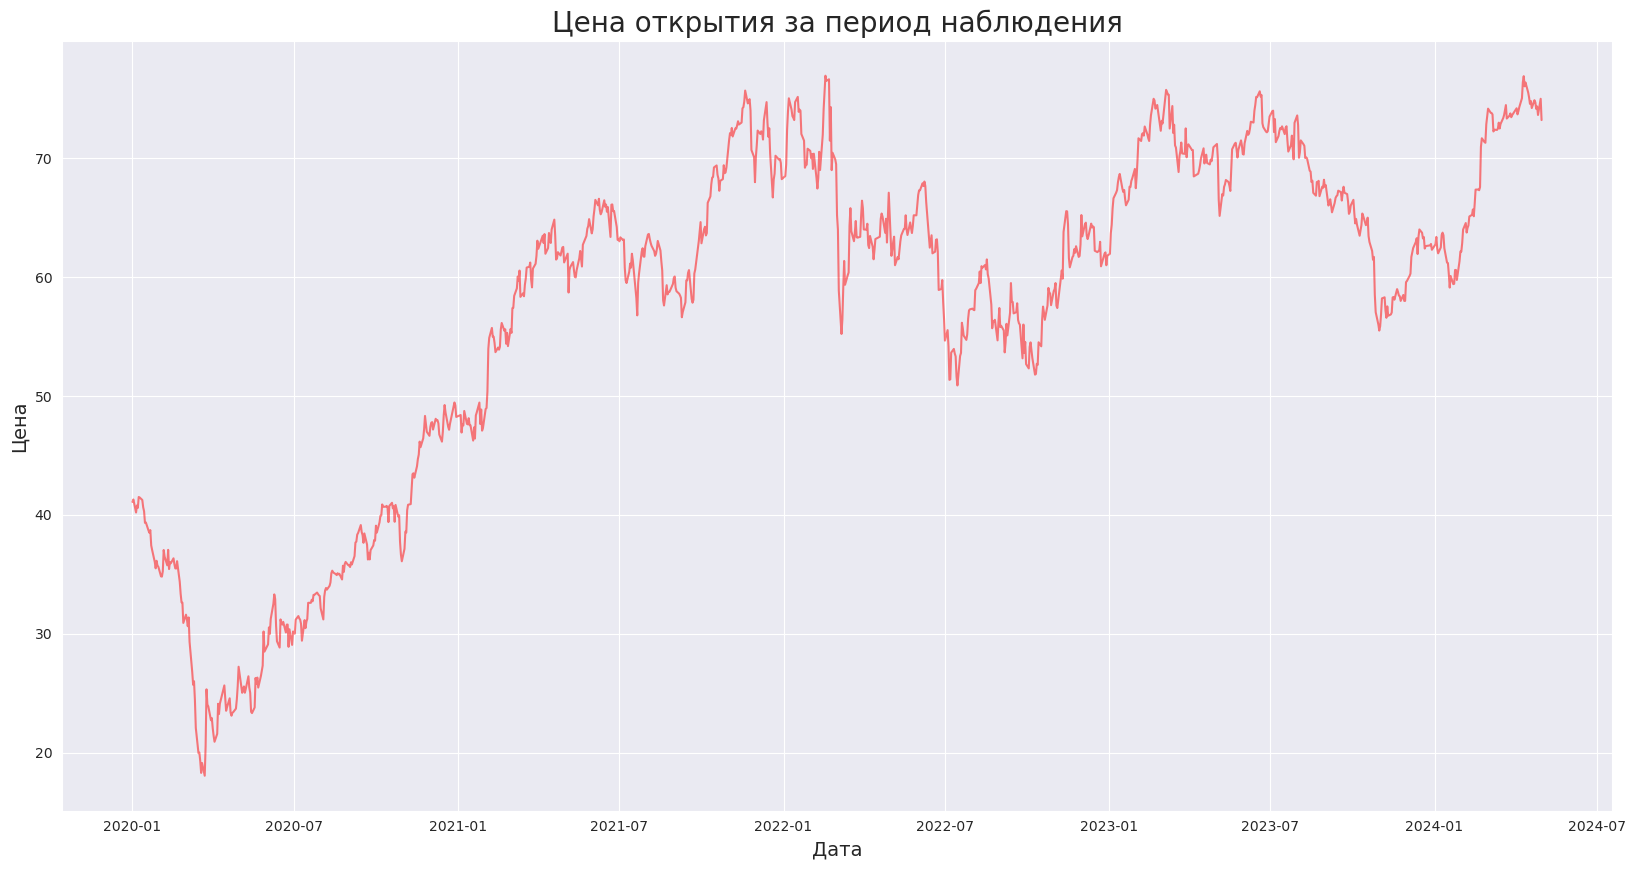

In [32]:
plt.figure(figsize = (20, 10))
sns.set_style('dark')
sns.lineplot(data = data, x = 'date', y = 'open', c = 'red', alpha = 0.5)
plt.title('Цена открытия за период наблюдения', fontsize = 20)
plt.xlabel('Дата', fontsize = 14)
plt.ylabel('Цена', fontsize = 14)
plt.grid()
plt.show()

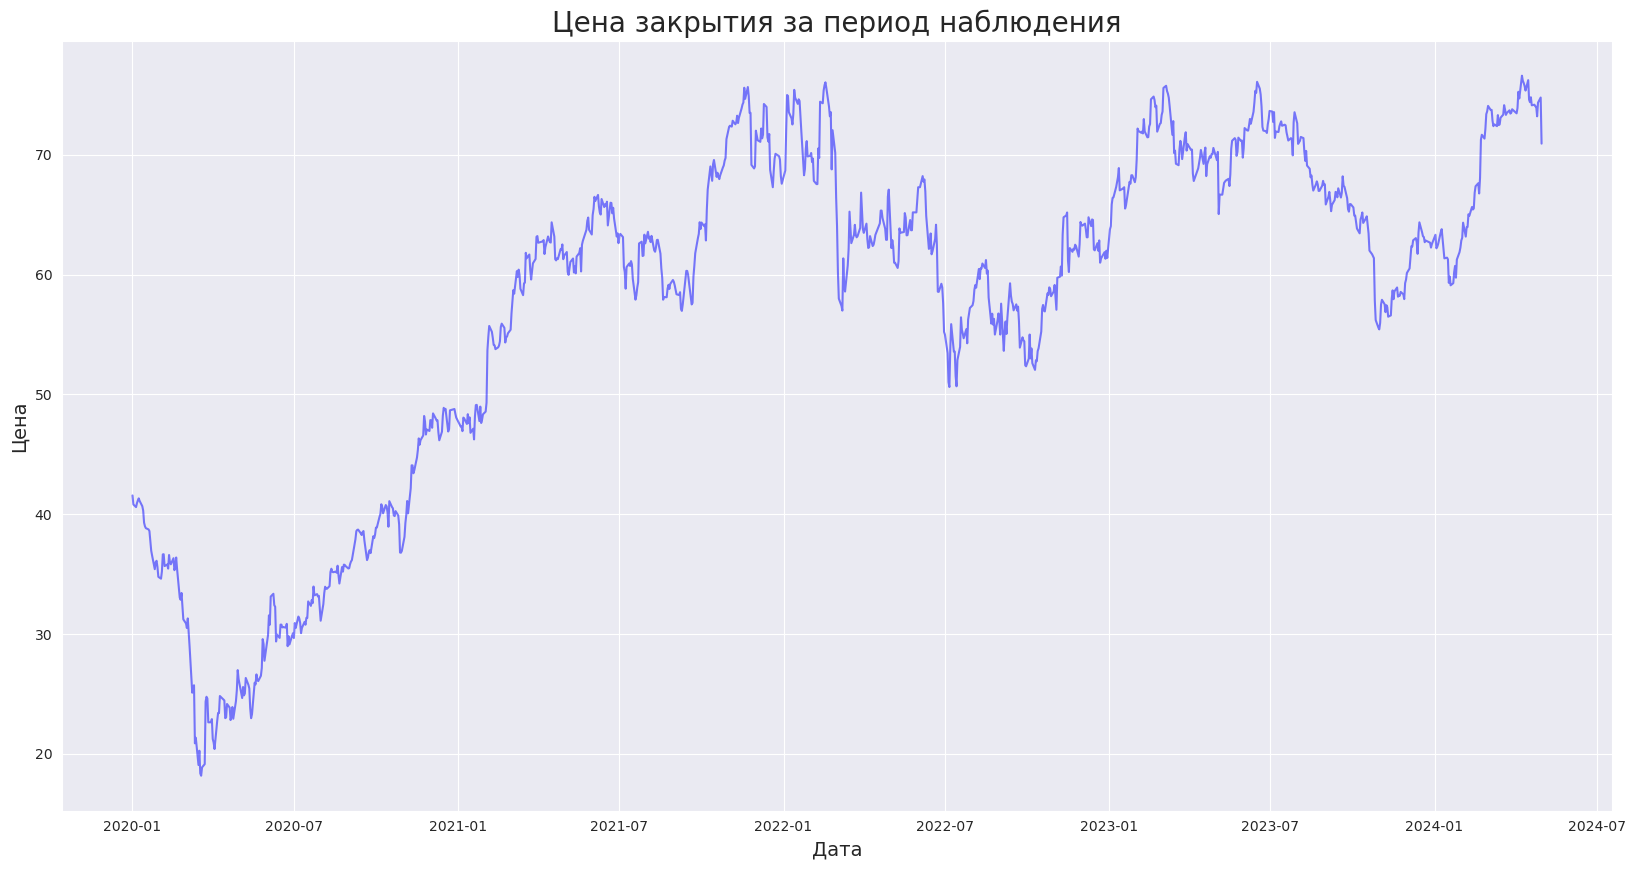

In [33]:
plt.figure(figsize = (20, 10))
sns.set_style('dark')
sns.lineplot(data = data, x = 'date', y = 'close', c = 'blue', alpha = 0.5)
plt.title('Цена закрытия за период наблюдения', fontsize = 20)
plt.xlabel('Дата', fontsize = 14)
plt.ylabel('Цена', fontsize = 14)
plt.grid()
plt.show()

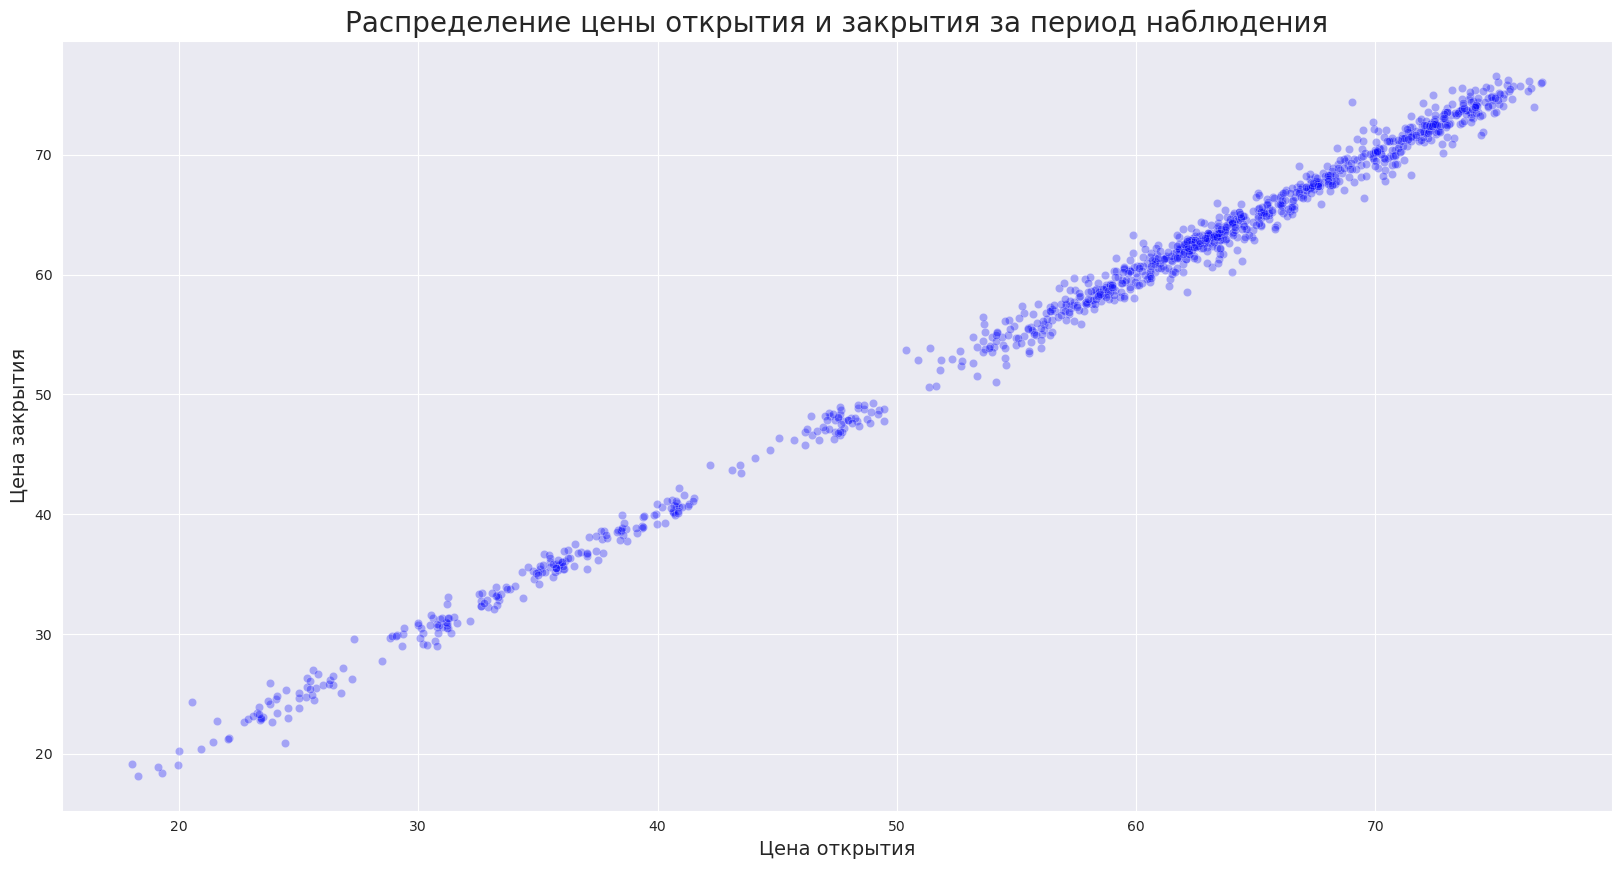

In [19]:
plt.figure(figsize = (20, 10))
sns.scatterplot(data = data, x = 'open', y = 'close', c = 'blue', alpha = 0.3)
plt.title('Распределение цены открытия и закрытия за период наблюдения', fontsize = 20)
plt.xlabel('Цена открытия', fontsize = 14)
plt.ylabel('Цена закрытия', fontsize = 14)
plt.grid()
plt.show()

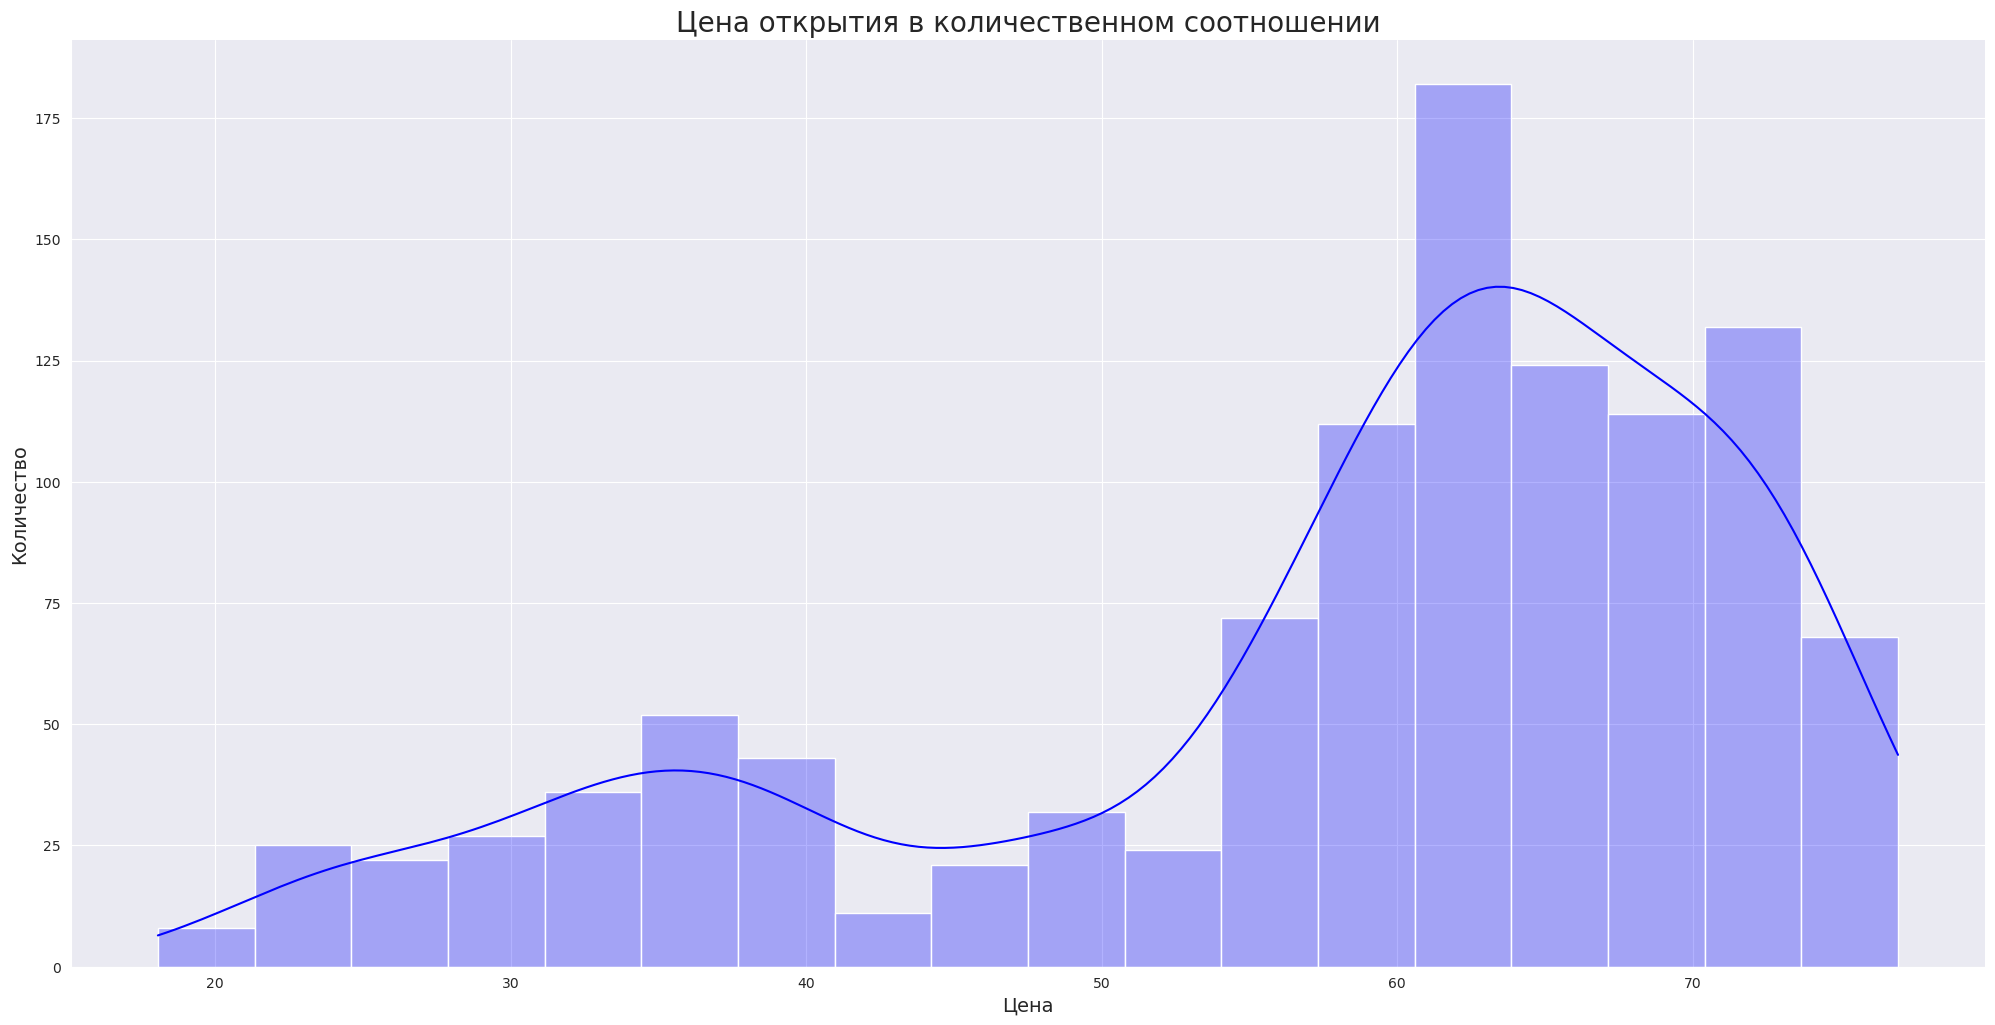

In [20]:
sns.displot(data = data, x = 'open', height = 10, aspect = 2, kde = 'True', color = 'blue', alpha = 0.3)
plt.title('Цена открытия в количественном соотношении', fontsize = 20)
plt.xlabel('Цена', fontsize = 14)
plt.ylabel('Количество', fontsize = 14)
plt.grid()
plt.show()

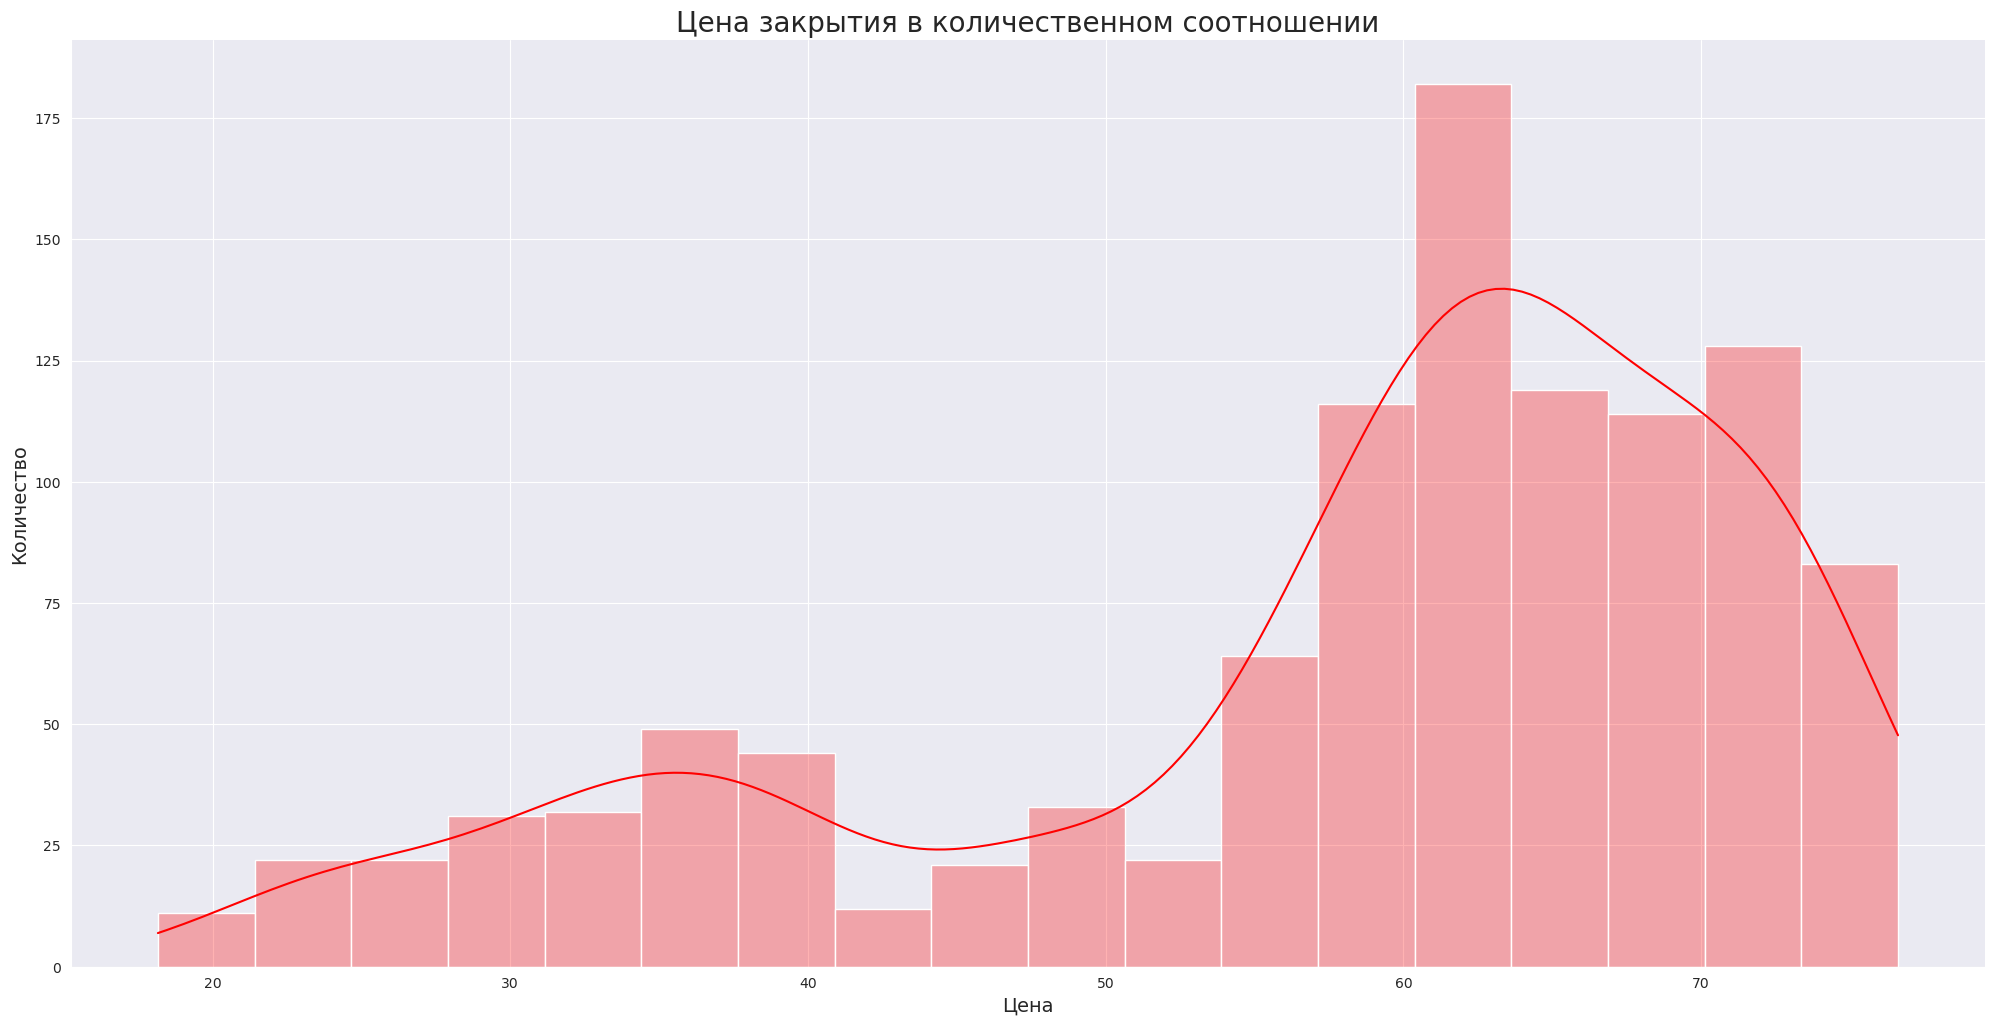

In [21]:
sns.displot(data = data, x = 'close', height = 10, aspect = 2, kde = 'True', color = 'red', alpha = 0.3)
plt.title('Цена закрытия в количественном соотношении', fontsize = 20)
plt.xlabel('Цена', fontsize = 14)
plt.ylabel('Количество', fontsize = 14)
plt.grid()
plt.show()

В первом квартале 2020 года наблюдается самое большое падение цены открытия и закрытия. Далее наблюдается рост стоимости
и до середины 2021 года происходит стабильный рост. Далее видна тенденция то увеличения по последующего уменьшения, с колебанием около 60 - 70.

**Рассмотрим максимальную и минимальную цены на период наблюдений**

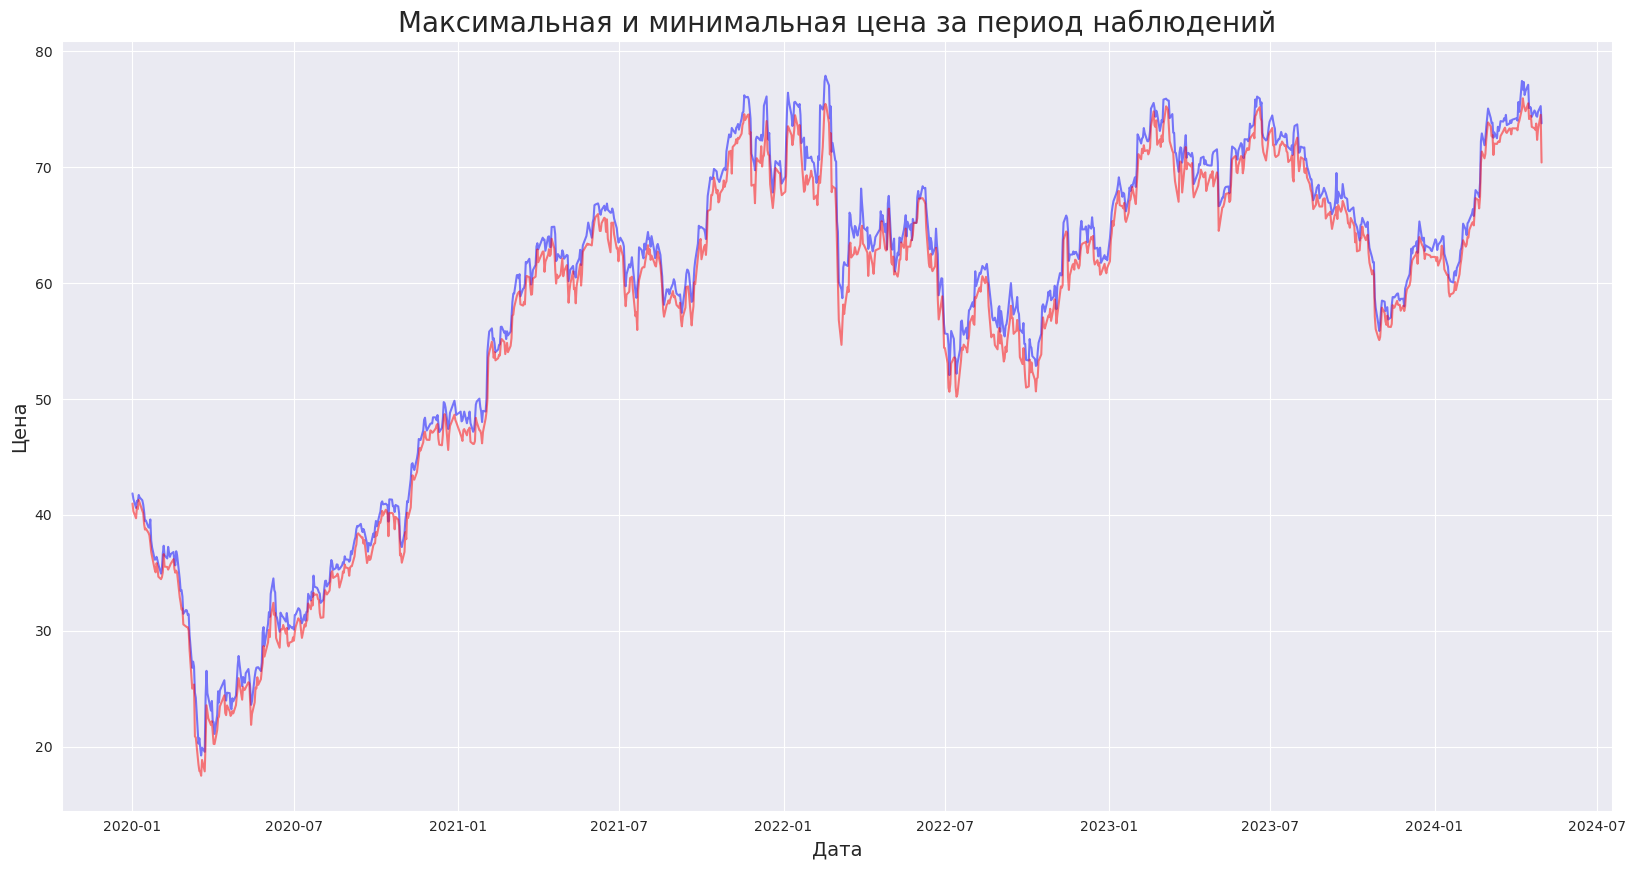

In [22]:
plt.figure(figsize = (20, 10))
sns.lineplot(data = data, x = 'date', y = 'high', c = 'blue', alpha = 0.5)
sns.lineplot(data = data, x = 'date', y = 'low', c = 'red', alpha = 0.5)
plt.title('Максимальная и минимальная цена за период наблюдений', fontsize = 20)
plt.xlabel('Дата', fontsize = 14)
plt.ylabel('Цена', fontsize = 14)
plt.grid()
plt.show()

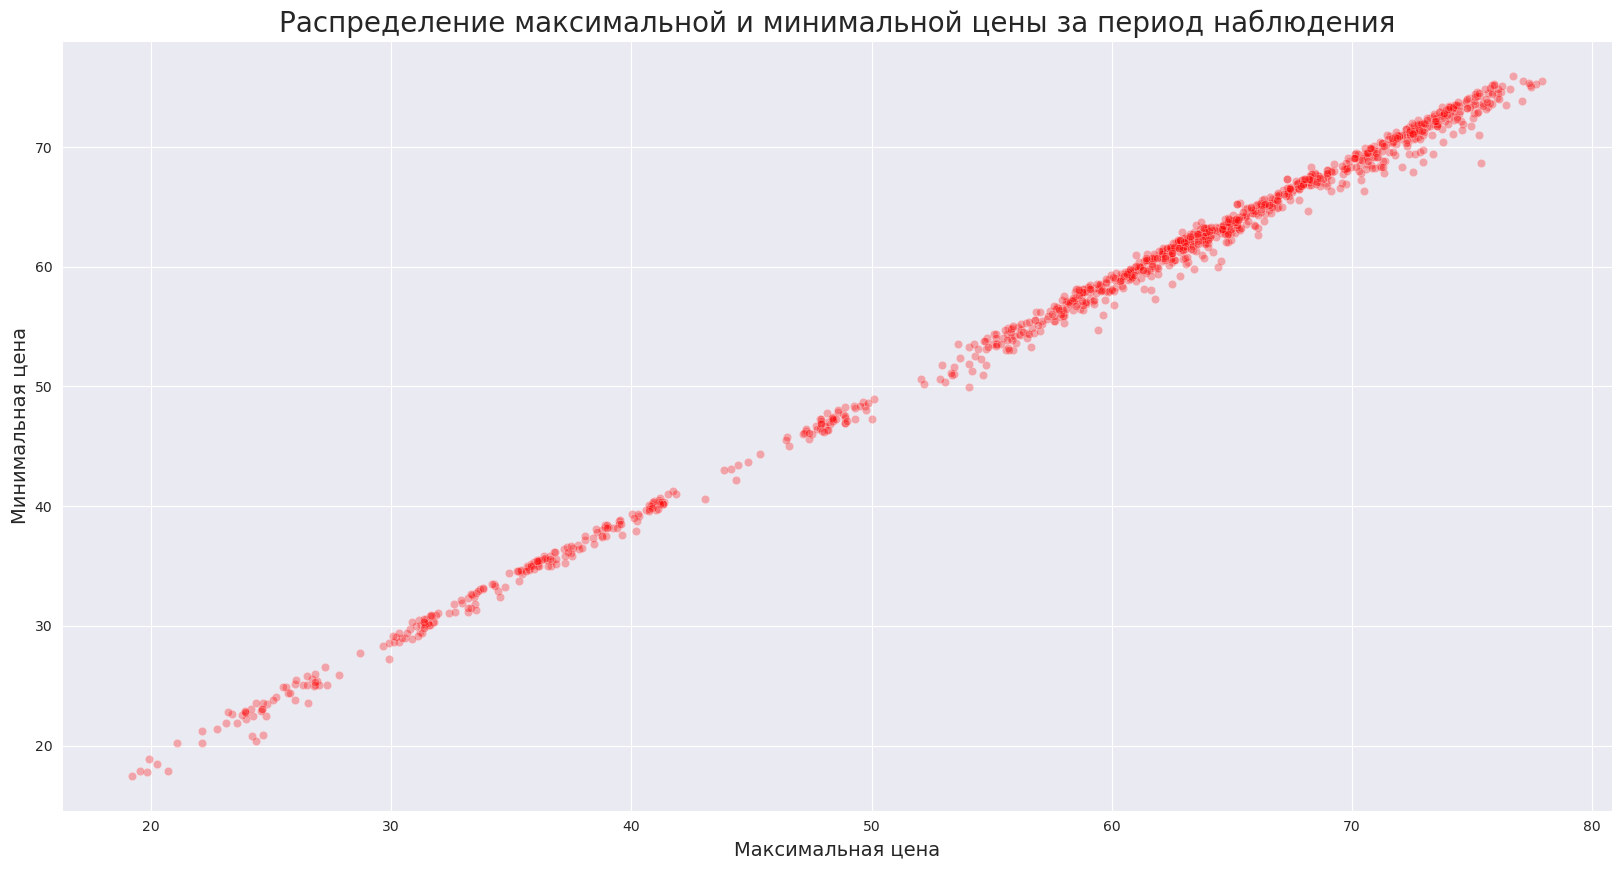

In [23]:
plt.figure(figsize = (20, 10))
sns.scatterplot(data = data, x = 'high', y = 'low', c = 'red', alpha = 0.3)
plt.title('Распределение максимальной и минимальной цены за период наблюдения', fontsize = 20)
plt.xlabel('Максимальная цена', fontsize = 14)
plt.ylabel('Минимальная цена', fontsize = 14)
plt.grid()
plt.show()

В первом квартале 2020 года наблюдается самое большое падение максимальной и минимальной цены. Далее наблюдается рост стоимости и до середины 2021 года происходит стабильный рост. Далее видна тенденция то увеличения по последующего уменьшения, с колебанием около 60 - 70.


**Далее объединим наблюдения по годам и посмотрим статистические значения сгруппированных данных**

In [24]:
data['year'] = data['date'].dt.year

In [25]:
close_year = data.groupby('year')['close'].agg('mean')
open_year = data.groupby('year')['open'].agg('mean')

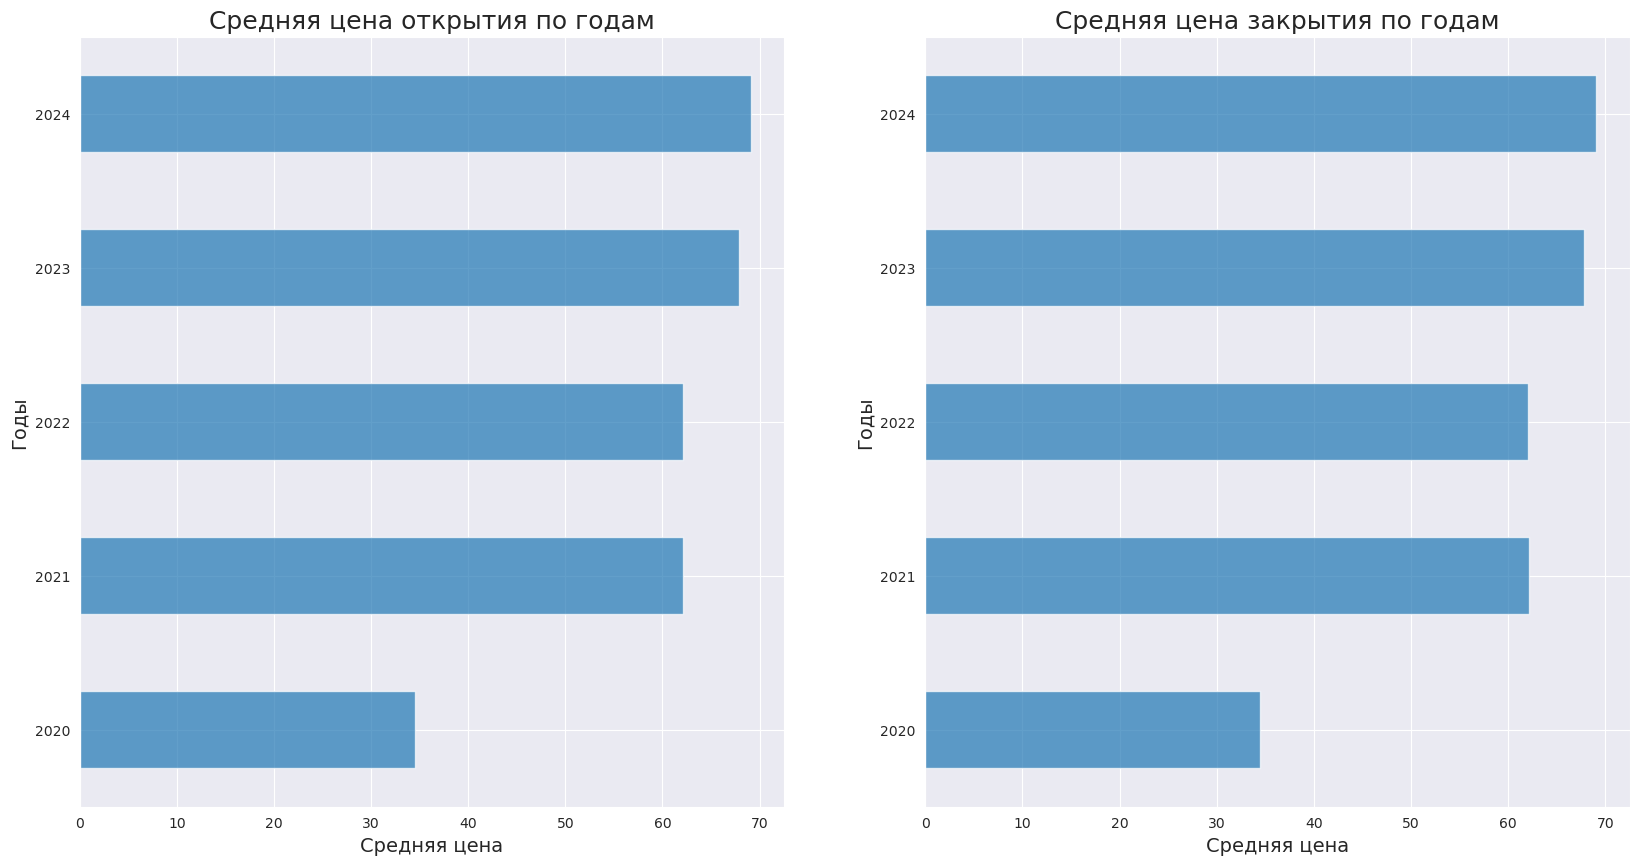

In [26]:
plt.figure(figsize = (20, 10))
plt.subplot(1, 2, 1)
open_year.plot(kind = 'barh', alpha = 0.7)
plt.title('Средняя цена открытия по годам', fontsize = 18)
plt.xlabel('Средняя цена', fontsize = 14)
plt.ylabel('Годы', fontsize = 14)
plt.grid()
plt.subplot(1, 2, 2)
close_year.plot(kind = 'barh', alpha = 0.7)
plt.title('Средняя цена закрытия по годам', fontsize = 18)
plt.xlabel('Средняя цена', fontsize = 14)
plt.ylabel('Годы', fontsize = 14)
plt.grid()
plt.show()

Из графиков видно, что с каждым годом происходит рост средней цены открытия и закрытия. Наименьшая стоимость акций находиться в начале наблюдаемого периода, наибольшая в конце наблюдаемого периода.

**Рассмотрим наглядно статистические показатели цены открытия и закрытия**

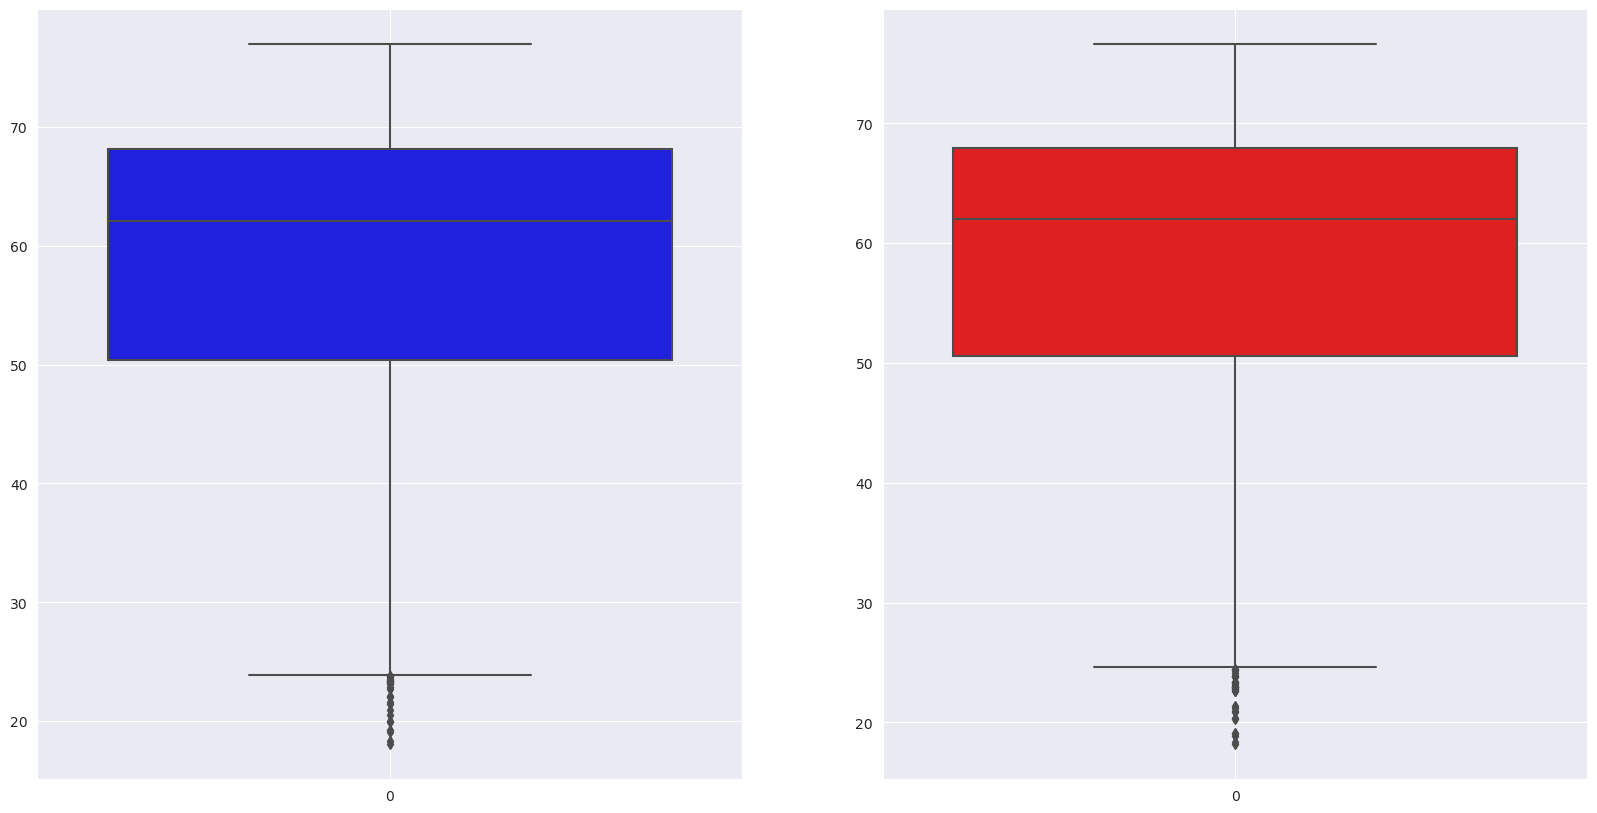

In [27]:
plt.figure(figsize = (20, 10))
plt.subplot(1, 2, 1)
sns.boxplot(data['open'], color = 'blue')
plt.grid()
plt.subplot(1, 2, 2)
sns.boxplot(data['close'], color = 'red')
plt.grid()
plt.show()

На графиках наглядно можно увидить статистические показатели цены открытия и закрытия:
* Медиана
* Верхний квартиль
* Нижний квартиль
* Минимальное значение
* Максимальное значение
* Наличие единичных показателей - выбросов

**Проанализируем объем торгов**

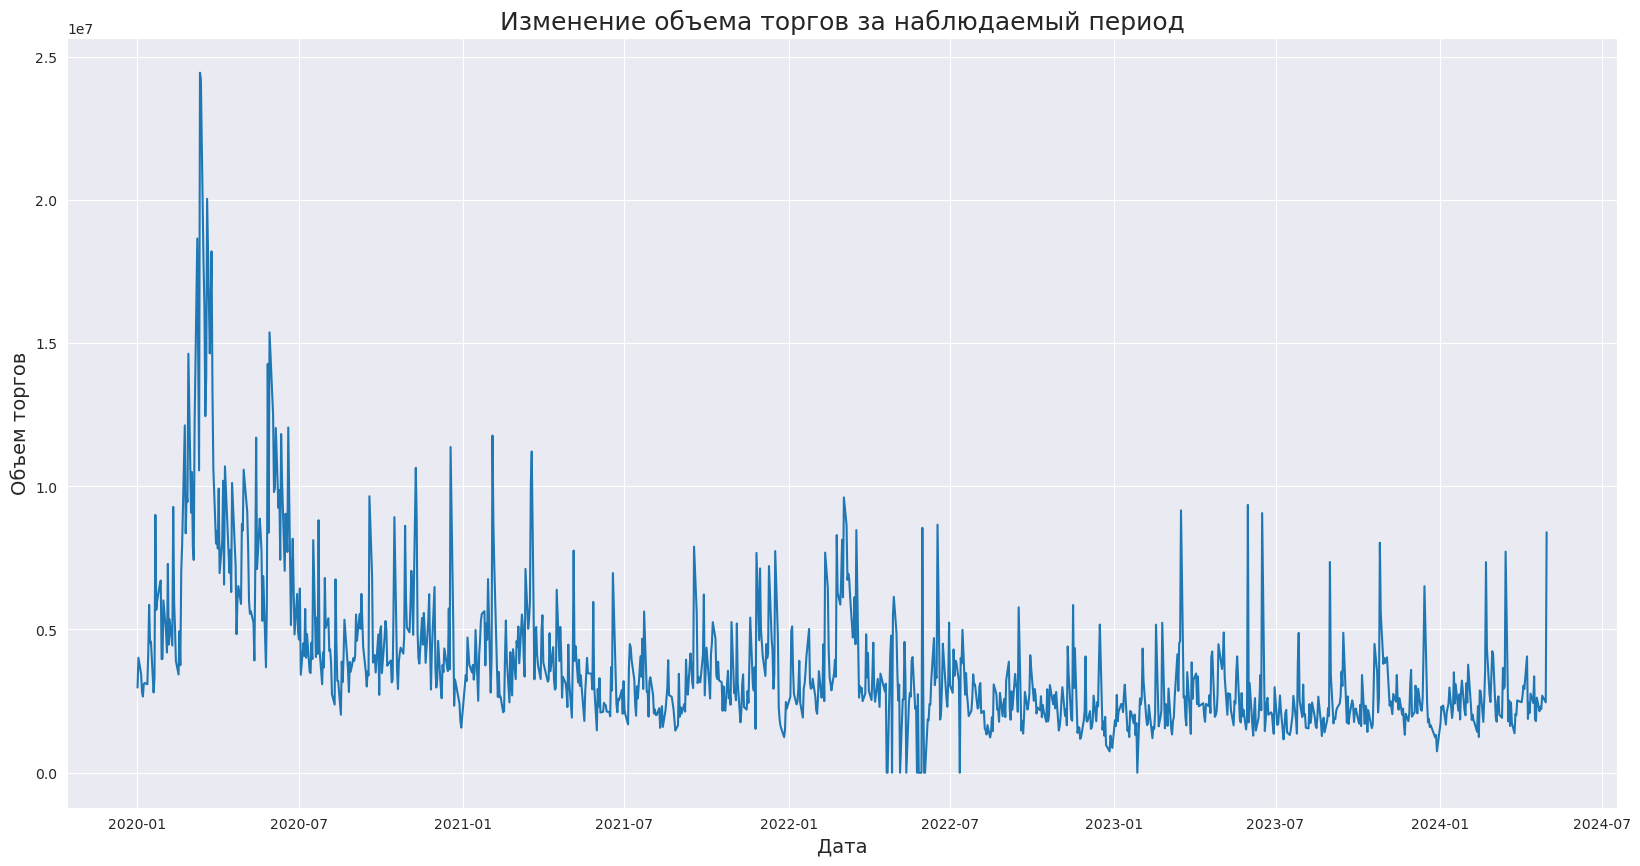

In [28]:
plt.figure(figsize = (20, 10))
sns.lineplot(data = data, x = 'date', y = 'volume')
plt.title('Изменение объема торгов за наблюдаемый период', fontsize = 18)
plt.xlabel('Дата', fontsize = 14)
plt.ylabel('Объем торгов', fontsize = 14)
plt.grid()
plt.show()

Максимальный объем торгов наблюдается в первой половине 2020 года. Далее по годам уже не наблюдается таких скачков, распределение идет более равномерно с небольшими колебаниями.

**Рассмотрим корреляцию между данными**

In [29]:
corr = data.corr()

In [30]:
corr

,date,open,high,low,close,adj_close,volume,year
date,1.000000,0.763744,0.761225,0.765405,0.762769,0.877919,-0.531974,0.973148
open,0.763744,1.000000,0.999034,0.998981,0.997960,0.972386,-0.599096,0.758165
high,0.761225,0.999034,1.000000,0.998774,0.999101,0.971738,-0.588599,0.756118
low,0.765405,0.998981,0.998774,1.000000,0.999051,0.974322,-0.609326,0.759021
close,0.762769,0.997960,0.999101,0.999051,1.000000,0.973696,-0.599344,0.756851
adj_close,0.877919,0.972386,0.971738,0.974322,0.973696,1.000000,-0.606198,0.866755
volume,-0.531974,-0.599096,-0.588599,-0.609326,-0.599344,-0.606198,1.000000,-0.487407
year,0.973148,0.758165,0.756118,0.759021,0.756851,0.866755,-0.487407,1.000000


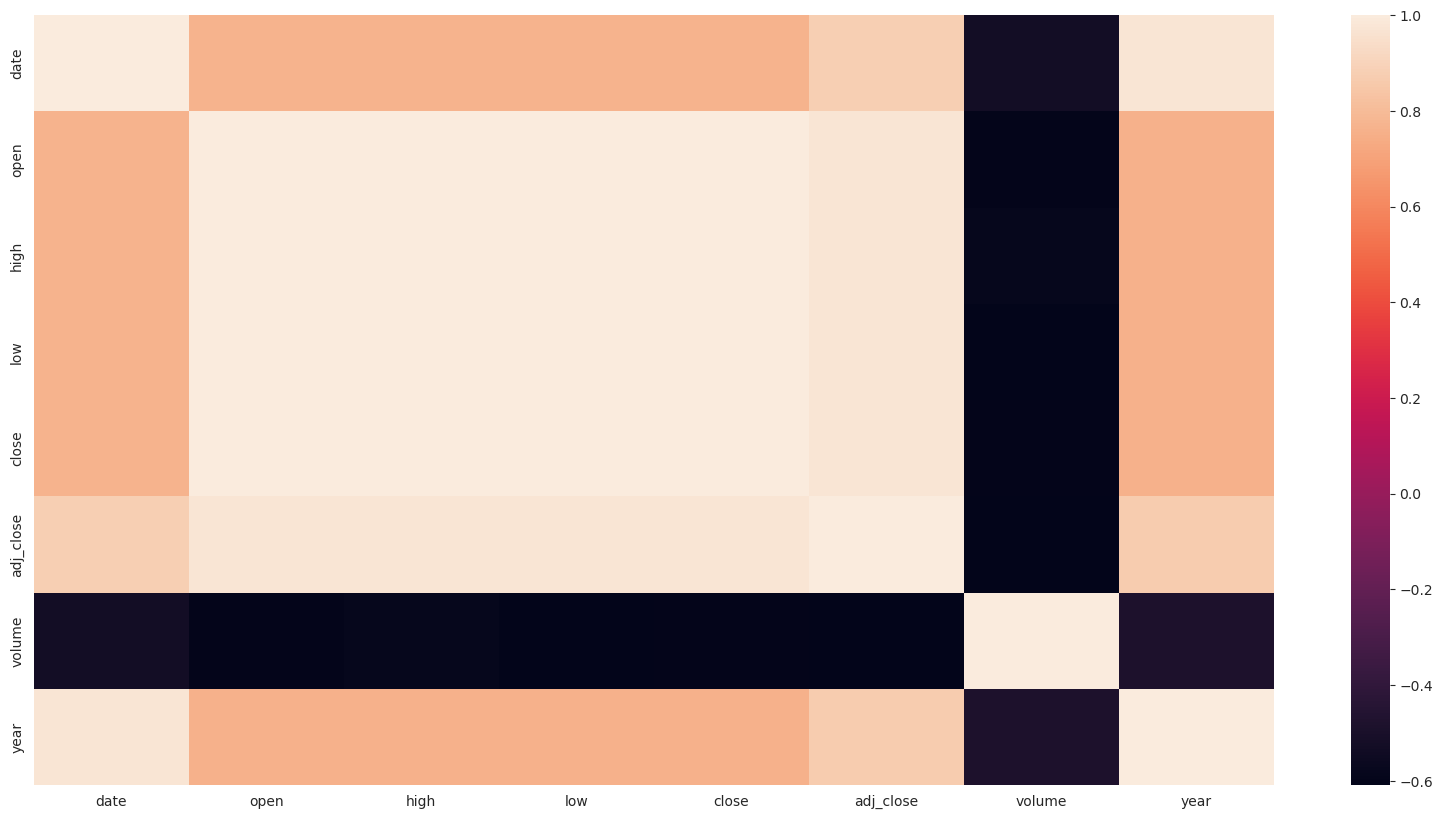

In [31]:
plt.figure(figsize = (20, 10))
sns.heatmap(corr)
plt.show()

Сильная положительная корреляция наблюдается между всеми ценами на акции. Средняя отрицательная корреляция наблюдается между объемом торгов и стоимотью акций.

### Выводы

1. Минимальная цена на акции(цена открытия, закрытия, минимальная цена, максимальная цена) приходится на самое начало периода наблюдений первая половина 2020 года. В дальнейшем происходит стабильный рост цены за весь период наблюдений.
2. Максимальный объем торгов приходится на начало 2020 года - период  минимальной цены на акции
3. Минимальная цена акций -18, максимальная 78. Медиана - около 60. Наибольшее колличество значений между 50 и 70.
4. Сильная положительная корреляция между ценами(открытия, закрытия, максимольной, минимальной). При увеличении одной увеличивается другая.
5. Средняя отрицательная корреляция между ценой и объемом торгов. При увеличении одного показателя снижается другой.